Analysis borrowed from here https://lifelines.readthedocs.io/en/latest/Survival%20Regression.html

In [10]:
from lifelines.datasets import load_rossi

rossi = load_rossi()
rossi.head()

,week,arrest,fin,age,race,wexp,mar,paro,prio
0,20,1,0,27,1,0,0,1,3
1,17,1,0,18,1,0,0,1,8
2,25,1,0,19,0,1,0,1,13
3,52,0,1,23,1,1,1,1,1
4,52,0,0,19,0,1,0,1,3


In [11]:
from lifelines import CoxPHFitter
cph = CoxPHFitter()
cph.fit(rossi, duration_col='week', event_col='arrest')

cph.print_summary()  # access the individual results using cph.summary

<lifelines.CoxPHFitter: fitted with 432 total observations, 318 right-censored observations>
             duration col = 'week'
                event col = 'arrest'
      baseline estimation = breslow
   number of observations = 432
number of events observed = 114
   partial log-likelihood = -658.75
         time fit was run = 2021-02-07 15:50:04 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
fin        -0.38       0.68       0.19            -0.75            -0.00                 0.47                 1.00
age        -0.06       0.94       0.02            -0.10            -0.01                 0.90                 0.99
race        0.31       1.37       0.31            -0.29             0.92                 0.75                 2.50
wexp       -0.15       0.86       0.21            -0.57             0.27                 0.57                 1.30
mar        -0.43       0.65       0.38            -1.18             0.31                 0.31                 1.37
paro       -0.08       0.92       0.20            -0.47             0.30                 0.63                 1.35
prio        0.09       1.10       0.03             0.04             0.15                 1.04                 1.16

              z      p   -log2(p)
covariate                        
fin       -1.98   0.05       4.40
age       -2.61   0.01       6.79
race       1.02   0.31       1.70
wexp      -0.71   0.48       1.06
mar       -1.14   0.26       1.97
paro      -0.43   0.66       0.59
prio       3.19 <0.005       9.48
---
Concordance = 0.64
Partial AIC = 1331.50
log-likelihood ratio test = 33.27 on 7 df
-log2(p) of ll-ratio test = 15.37

If we want, we can provide an R-like regression formula
```python
cph.fit(rossi, duration_col='week', event_col='arrest', formula="fin + wexp + age * prio")
cph.print_summary()
```

From the lifelines documentation: https://lifelines.readthedocs.io/en/latest/Survival%20Regression.html
> To access the coefficients and the baseline hazard directly, you can use params_ and baseline_hazard_ respectively. Taking a look at these coefficients for a moment, prio (the number of prior arrests) has a coefficient of about 0.09. Thus, a one unit increase in prio means the the baseline hazard will increase by a factor of $e^{0.09} = 1.10$ - about a 10% increase. Recall, in the Cox proportional hazard model, a higher hazard means more at risk of the event occurring. The value $e^{0.09}$ is called the hazard ratio, a name that will be clear with another example.

From the lifelines documentation:

> Consider the coefficient of mar (whether the subject is married or not). The values in the column are binary: 0 or 1, representing either unmarried or married. The value of the coefficient associated with mar, exp(−.43), is the value of ratio of hazards associated with being married, that is:

$$e^{−0.43}= \frac{\text{hazard of married subjects at time t}}{\text{hazard of unmarried subjects at time t}}$$

>Note that left-hand side is a constant (specifically, it’s independent of time, t), but the right-hand side has two factors that may vary with time. The proportional hazard assumption is that relationship is true. That is, hazards can change over time, but their ratio between levels remains a constant. Later we will deal with checking this assumption. However, in reality, it’s very common for the hazard ratio to change over the study duration. The hazard ratio then has the interpretation of some sort of weighted average of period-specific hazard ratios. As a result, the hazard ratio may critically depend on the duration of the follow-up.

In [12]:
cph.predict_survival_function(rossi)


,0,1,2,3,4,5,6,7,8,9,...,422,423,424,425,426,427,428,429,430,431
1.0,0.997616,0.993695,0.994083,0.999045,0.997626,0.997578,0.998865,0.997827,0.995453,0.997462,...,0.997826,0.996005,0.996031,0.997774,0.998892,0.999184,0.997033,0.998866,0.998170,0.998610
2.0,0.995230,0.987411,0.988183,0.998089,0.995250,0.995154,0.997728,0.995653,0.990914,0.994922,...,0.995649,0.992014,0.992067,0.995547,0.997782,0.998366,0.994065,0.997730,0.996337,0.997217
3.0,0.992848,0.981162,0.982314,0.997133,0.992878,0.992734,0.996592,0.993482,0.986392,0.992388,...,0.993476,0.988037,0.988115,0.993324,0.996673,0.997548,0.991105,0.996595,0.994507,0.995826
4.0,0.990468,0.974941,0.976468,0.996176,0.990507,0.990316,0.995455,0.991311,0.981882,0.989855,...,0.991304,0.984067,0.984171,0.991100,0.995563,0.996729,0.988147,0.995458,0.992676,0.994433
5.0,0.988085,0.968739,0.970639,0.995216,0.988135,0.987895,0.994315,0.989139,0.977378,0.987320,...,0.989129,0.980101,0.980231,0.988875,0.994450,0.995909,0.985189,0.994319,0.990843,0.993039
6.0,0.985699,0.962552,0.964820,0.994254,0.985758,0.985471,0.993172,0.986961,0.972877,0.984781,...,0.986950,0.976134,0.976290,0.986645,0.993334,0.995085,0.982227,0.993177,0.989006,0.991640
7.0,0.983305,0.956370,0.959004,0.993287,0.983374,0.983039,0.992024,0.984777,0.968371,0.982235,...,0.984764,0.972162,0.972343,0.984409,0.992213,0.994258,0.979258,0.992030,0.987162,0.990236
8.0,0.971402,0.926001,0.930402,0.988460,0.971520,0.970950,0.986294,0.973910,0.946118,0.969581,...,0.973888,0.952510,0.952816,0.973282,0.986619,0.990125,0.964523,0.986304,0.977978,0.983232
9.0,0.966614,0.913958,0.919043,0.986508,0.966752,0.966089,0.983979,0.969536,0.937236,0.964495,...,0.969510,0.944651,0.945006,0.968804,0.984358,0.988453,0.958609,0.983991,0.974277,0.980405
10.0,0.964223,0.907978,0.913399,0.985531,0.964370,0.963660,0.982821,0.967350,0.932815,0.961954,...,0.967323,0.940735,0.941114,0.966567,0.983226,0.987616,0.955657,0.982833,0.972426,0.978990


In [13]:
cph.predict_median(rossi)


0       inf
1      44.0
2      46.0
3       inf
4       inf
       ... 
427     inf
428     inf
429     inf
430     inf
431     inf
Name: 0.5, Length: 432, dtype: float64

In [14]:
cph.predict_partial_hazard(rossi)

0      1.219126
1      3.230250
2      3.031058
3      0.487712
4      1.214024
         ...   
427    0.416973
428    1.517713
429    0.579426
430    0.935629
431    0.710516
Length: 432, dtype: float64

We can add an L1 penalty as follows

```python
cph = CoxPHFitter(penalizer=0.1, l1_ratio=1.0) # sparse solutions,
cph.fit(rossi, 'week', 'arrest')
cph.print_summary()
```

<AxesSubplot:xlabel='log(HR) (95% CI)'>

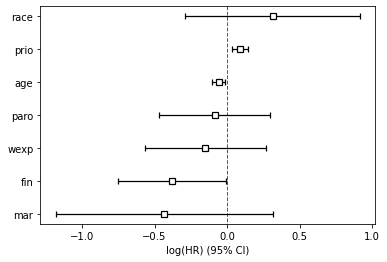

In [15]:
# plot the coefficients

cph.plot()

<AxesSubplot:>

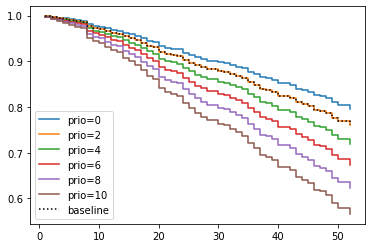

In [23]:
cph.plot_partial_effects_on_outcome(covariates='prio', values=[0, 2, 4, 6, 8, 10])

<AxesSubplot:>

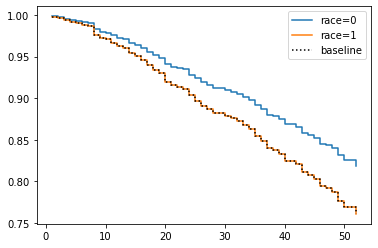

In [24]:
cph.plot_partial_effects_on_outcome(covariates='race', values=[0, 1])

In [26]:
cph.check_assumptions(rossi)

The ``p_value_threshold`` is set at 0.01. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.



/Users/arjunchandrasekhar/opt/anaconda3/envs/cmpinf2120/lib/python3.9/site-packages/lifelines/fitters/mixins.py:108: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  for variable in self.params_.index & (columns or self.params_.index):


<lifelines.StatisticalResult: proportional_hazard_test>
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 432 total observations, 318 right-censored observations>
         test_name = proportional_hazard_test

---
           test_statistic      p  -log2(p)
age  km             11.03 <0.005     10.12
     rank           11.45 <0.005     10.45
fin  km              0.02   0.89      0.17
     rank            0.02   0.90      0.15
mar  km              0.60   0.44      1.19
     rank            0.71   0.40      1.32
paro km              0.12   0.73      0.45
     rank            0.13   0.71      0.49
prio km              0.02   0.88      0.18
     rank            0.02   0.89      0.17
race km              1.44   0.23      2.12
     rank            1.43   0.23      2.11
wexp km              7.48   0.01      7.32
     rank            7.31   0.01      7.19



1. Variable 'age' failed the non-proportional test: p-value is 0.0007.

   Advice 1: the functional form of the variable 'age' might be incorrect. That is, there may be
non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link [D] below on how to specify a functional form.

   Advice 2: try binning the variable 'age' using pd.cut, and then specify it in `strata=['age',
...]` in the call in `.fit`. See documentation in link [B] below.

   Advice 3: try adding an interaction term with your time variable. See documentation in link [C]
below.


2. Variable 'wexp' failed the non-proportional test: p-value is 0.0063.

   Advice: with so few unique values (only 2), you can include `strata=['wexp', ...]` in the call in
`.fit`. See documentation in link [E] below.

---
[A]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html
[B]  https://lifelines.readthedocs.io/en/lat

[]

In [27]:
cph_spline = CoxPHFitter(baseline_estimation_method="spline", n_baseline_knots=5)
cph_spline.fit(rossi, 'week', event_col='arrest')

<lifelines.CoxPHFitter: fitted with 432 total observations, 318 right-censored observations>

<AxesSubplot:>

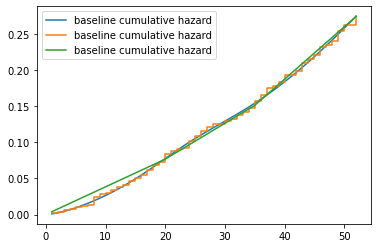

In [28]:
cph_semi = CoxPHFitter().fit(rossi, 'week', event_col='arrest')
cph_piecewise = CoxPHFitter(baseline_estimation_method="piecewise", breakpoints=[20, 35]).fit(rossi, 'week', event_col='arrest')

ax = cph_spline.baseline_cumulative_hazard_.plot()
cph_semi.baseline_cumulative_hazard_.plot(ax=ax, drawstyle="steps-post")
cph_piecewise.baseline_cumulative_hazard_.plot(ax=ax)